<a href="https://www.kaggle.com/code/leonquaddy/assignment1-robotics-automation?scriptVersionId=161249348" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
#!pip install google-colab

In [39]:
#Import libraries
import cv2
import pandas
import os

from IPython.display import display
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

from time import time
#from google. colab.patches import cv2_imshow

In [ ]:
#!pip install opencv-python

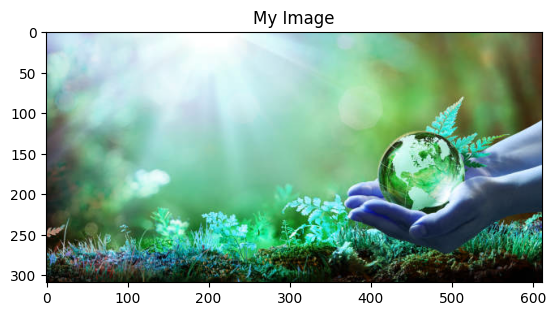

CPU times: user 456 ms, sys: 3.83 ms, total: 460 ms
Wall time: 458 ms


In [40]:
%%time
#D2sp1äY en imgge locelly 2n 9 popup wzndow us2ng Cv2 mshow
img3 = cv2.imread('/kaggle/input/demo-image/environment.jpg')


plt.imshow(img3)
plt.title('My Image')
plt.show()

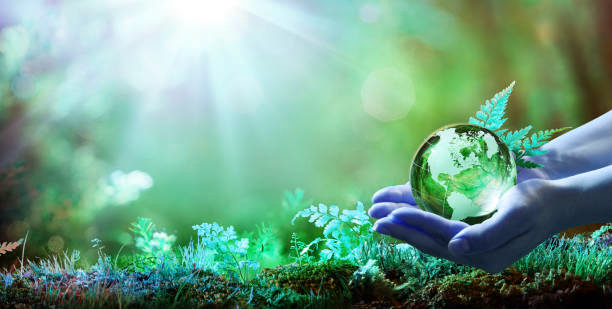

CPU times: user 91.9 ms, sys: 1.85 ms, total: 93.8 ms
Wall time: 92.6 ms


In [41]:
%%time
# Display an image using IPython display
# import libraries

import cv2

import numpy as np
import os

from IPython.display import display
from PIL import Image

img3 = cv2.imread('/kaggle/input/demo-image/environment.jpg')
display(Image.fromarray(img3))

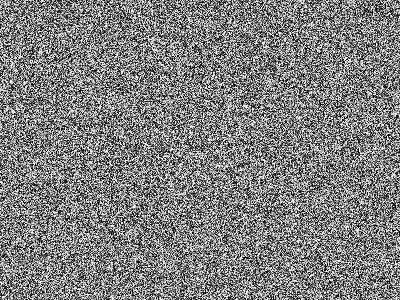

CPU times: user 14.4 ms, sys: 2.11 ms, total: 16.5 ms
Wall time: 14.6 ms


In [42]:
%%time
import cv2

import numpy as np
import os

# Make an array of 120,000 random bytes.
randomByteArray = bytearray(os.urandom(120000))
flatNumpyArray = np.array(randomByteArray)

#Convert the array to make a 400x300 grayscale image.
grayImage = flatNumpyArray.reshape(300, 400)


display(Image.fromarray(grayImage))

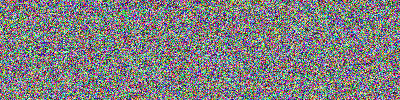

CPU times: user 15.5 ms, sys: 203 µs, total: 15.7 ms
Wall time: 14.1 ms


In [43]:
%%time
#Convert the array to make a 400x100 color image and write to file.
bgrImage = flatNumpyArray.reshape(100,400,3)

display(Image.fromarray(bgrImage))

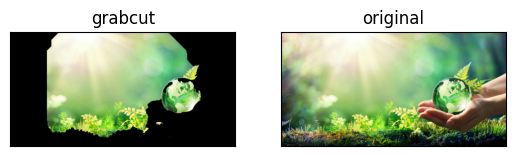

CPU times: user 3.75 s, sys: 74.3 ms, total: 3.83 s
Wall time: 3.62 s


In [44]:
%%time
original = cv2.imread('/kaggle/input/demo-image/environment.jpg')
img = original.copy()
mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (100, 1, 421, 378)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("grabcut")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("original")
plt.xticks([])
plt.yticks([])

plt.show()

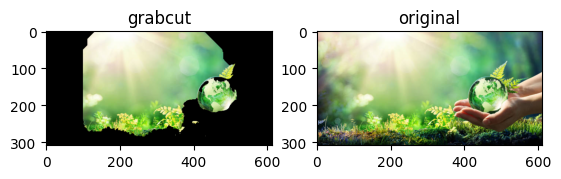

CPU times: user 409 ms, sys: 9.13 ms, total: 418 ms
Wall time: 402 ms


In [45]:
%%time
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("grabcut")

plt.subplot(122)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("original")


plt.show()

In [ ]:
#!pip install ipywidgets

In [46]:
%%time
import ipywidgets
from IPython.display import display

def bgr8_to_jpeg(value, quality=75):
    return bytes(cv2.imencode('.jpg', value)[1])

image_widget = ipywidgets.Image(format='jpeg')

image_widget.value = bgr8_to_jpeg(original)

display(image_widget)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

CPU times: user 15.5 ms, sys: 934 µs, total: 16.4 ms
Wall time: 13.3 ms


In [ ]:
#!pip install opencv-contrib-python

In [47]:
import pycuda.driver as drv
import pycuda.autoinit
from pycuda.compiler import SourceModule
import numpy as np
import cv2
import ipywidgets
from IPython.display import display

#convert image to jpg for display
def bgr8_to_jpeg(value, quality=75):
    return bytes(cv2.imencode('.jgp', value)[1])

In [ ]:
#!!pip install pycuda  #install cuda
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

In [48]:
%%time
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

# pass c code to perform work on GPU

mod = SourceModule \
    (
        '''
extern "C"{
#include<stdio.h>
#define INDEX(a, b) a*256+b

__global__ void bgr2gray(float *d_result,float *b_img, float *g_img, float *r_img)
{
unsigned int idx = threadIdx.x+(blockIdx.x*(blockDim.x*blockDim.y));

unsigned int a =idx/256;
unsigned int b =idx%256;
d_result[INDEX(a, b)] = (0.299*r_img[INDEX(a, b)]+0.587*g_img[INDEX(a, b)]+0.114*b_img[INDEX(a, b)]);
}
}
        
       ''',

       no_extern_c=True,
       include_dirs=['/usr/local/cuda/include']
)


CPU times: user 5.55 ms, sys: 4.87 ms, total: 10.4 ms
Wall time: 122 ms


(309, 612, 3)
(189108,)


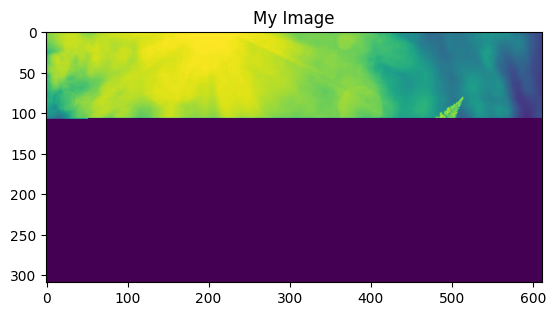

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

CPU times: user 287 ms, sys: 9.52 ms, total: 297 ms
Wall time: 290 ms


In [50]:
%%time
import numpy as np
import ipywidgets
from IPython.display import display
from PIL import Image
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from time import time
# convert image to jpg for display
def bgr8_to_jpeg(value, quality=75):
    return bytes(cv2.imencode('.jpg', value)[1])

h_img = cv2.imread('/kaggle/input/demo-image/environment.jpg',1)
print(h_img.shape)



g_gray=cv2.cvtColor(h_img,cv2.COLOR_BGR2GRAY)
#print a
b_img = h_img[:, :, 0].reshape(-1).astype(np.float32)
g_img = h_img[:, :, 1].reshape(-1).astype(np.float32)
r_img = h_img[:, :, 2].reshape(-1).astype(np.float32)
h_result = r_img
bgr2gray = mod.get_function("bgr2gray")


print(h_result.shape)

#call pycude function
bgr2gray(cuda.Out(h_result),cuda.In(b_img),cuda.In(g_img),cuda.In(r_img),block=(1024, 1, 1), grid=(64, 1, 1))

h_result = h_result.reshape(-1).astype(np.uint8)

# using plt
# Get the original shape of the image
height, width, channels = h_img.shape

# Reshape h_result into a 2D array
h_result = h_result.reshape(height, width)

# Display the image
plt.imshow(h_result)

plt.title('My Image')
plt.show()

#display transformd image and using widget
image_widget = ipywidgets.Image(format='jpeg')
image_widget.value = bgr8_to_jpeg(h_result)
display(image_widget)

#original image
orgimage_widget = ipywidgets.Image(format='jpeg')
orgimage_widget.value = bgr8_to_jpeg(h_img)
display(orgimage_widget)




In [51]:
%%time
mod = SourceModule \
    (
"""
    extern "C" {
__global__ void add_num(float *d_result, float *d_a, float *d_b, int N)
{
int tid = threadIdx.x +blockIdx.x * blockDim.x;
    while(tid<N)
    {
    d_result[tid] = d_a[tid] + d_b[tid];
    if(d_result[tid]>255)
    {
    d_result[tid]=255;
    }
    tid = tid +blockDim.x * gridDim.x;
  
  }
    
    
    }
    }
    """,
       no_extern_c=True,
       include_dirs=['/usr/local/cuda/include']



)

CPU times: user 1.22 ms, sys: 1.05 ms, total: 2.27 ms
Wall time: 1.48 ms


In [52]:
img1 = cv2.imread('/kaggle/input/demo-image/environment.jpg',0)
img2 = cv2.imread('/kaggle/input/demo-image/environment.jpg',0)
print(img1.shape)
print(img2.shape)

(309, 612)
(309, 612)


In [53]:
h_img1 = img1.reshape(-1).astype(np.float32)
h_img2 = img2.reshape(-1).astype(np.float32)
print(h_img1.shape)
print(h_img2.shape)

(189108,)
(189108,)


In [54]:
N = h_img1.size
h_result = h_img1
print(N)
print(h_result)

189108
[207. 207. 208. ...   2.   2.   2.]


In [55]:
add_img = mod.get_function("add_num")
add_img(cuda.Out(h_result), cuda.In(h_img1), cuda.In(h_img2),np.uint32(N),block=(1024, 1, 1), grid=(64, 1, 1))

h_result = h_result.reshape(-1).astype(np.uint8)

In [57]:
image_widget = ipywidgets.Image(format='jpeg')
h_result_resized = cv2.resize(h_result, (640, 480))

# Encode the resized image
image_widget.value = bgr8_to_jpeg(h_result_resized)
display(image_widget)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

CPU times: user 38.9 ms, sys: 4.96 ms, total: 43.9 ms
Wall time: 40.3 ms


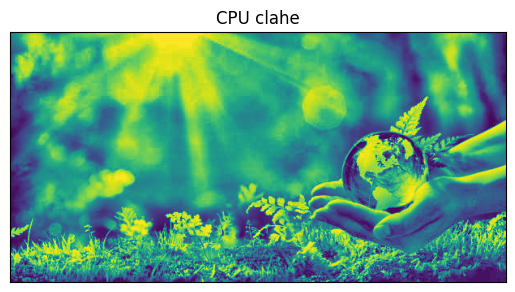

In [58]:
%%time

img = cv2.imread('/kaggle/input/demo-image/environment.jpg',cv2.IMREAD_GRAYSCALE)

def plotImages(imgr):
    plt.imshow(imgr)
    plt.title("CPU clahe")
    plt.xticks([])
    plt.yticks([])
    
    
#contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
imgr = clahe.apply(img)

plotImages(imgr)

In [59]:
%%time
import pycuda.gpuarray as gpuarray
import pycuda.driver as cuda
import pycuda.autoinit
import numpy
from pycuda.compiler import SourceModule

# Define the CUDA function
mod = SourceModule(
    """
    extern "C" {
    __global__ void double_array(float *a, int N)
    {
        int tid = threadIdx.x + blockIdx.x * blockDim.x;
        while(tid < N)
        {
            a[tid] *= 2;
            tid += blockDim.x * gridDim.x;
        }
    }
    }
    """,
    no_extern_c=True,
    include_dirs=['/usr/local/cuda/include']  # Specify the CUDA include directory
)

# Get the function from the module
double_array = mod.get_function("double_array")

# Create a random array and upload it to the GPU
a = numpy.random.randn(4,4).astype(numpy.float32)
a_gpu = gpuarray.to_gpu(a)

# Double the array on the GPU
double_array(a_gpu, numpy.int32(a.size), block=(256,1,1), grid=(a.size//256+1,1))

# Download the result and print it
a_doubled = a_gpu.get()
print(a_doubled)


[[-2.1681437  -1.6078141   1.3565818   0.04709487]
 [ 0.55524826 -2.9608328  -3.776395   -1.0586665 ]
 [ 0.16911176  3.8926673   0.68751574 -3.1401138 ]
 [-1.4541744   1.6445515   0.28391862 -3.876982  ]]
CPU times: user 3.5 ms, sys: 1.09 ms, total: 4.58 ms
Wall time: 3.71 ms


In [ ]:
#!pip install numba



In [37]:
import numpy as np
from numba import cuda, vectorize, float32

# Define the vector addition CUDA kernel
@cuda.jit
def vector_addition(a, b, result):
    i = cuda.grid(1)
    if i < len(result):
        result[i] = a[i] + b[i]

# Host code
def main():
    # Define the size of the vectors
    vector_size = 1000000

    # Generate random input vectors
    a = np.random.random(vector_size).astype(np.float32)
    b = np.random.random(vector_size).astype(np.float32)

    # Allocate memory on the device
    d_a = cuda.to_device(a)
    d_b = cuda.to_device(b)
    d_result = cuda.device_array_like(a)

    # Set up the grid and block dimensions
    block_size = 128
    grid_size = (vector_size + block_size - 1) // block_size

    # Launch the CUDA kernel
    vector_addition[grid_size, block_size](d_a, d_b, d_result)

    # Copy the result back to the host
    result = d_result.copy_to_host()

    # Print the first 10 elements of the result
    print("First 10 elements of the result:")
    print(result[:10])

if __name__ == "__main__":
    main()


First 10 elements of the result:
[1.0063857  0.22433537 0.6881436  1.0986854  1.0524611  1.6182811
 1.3467246  1.7531819  1.0436817  1.6664815 ]


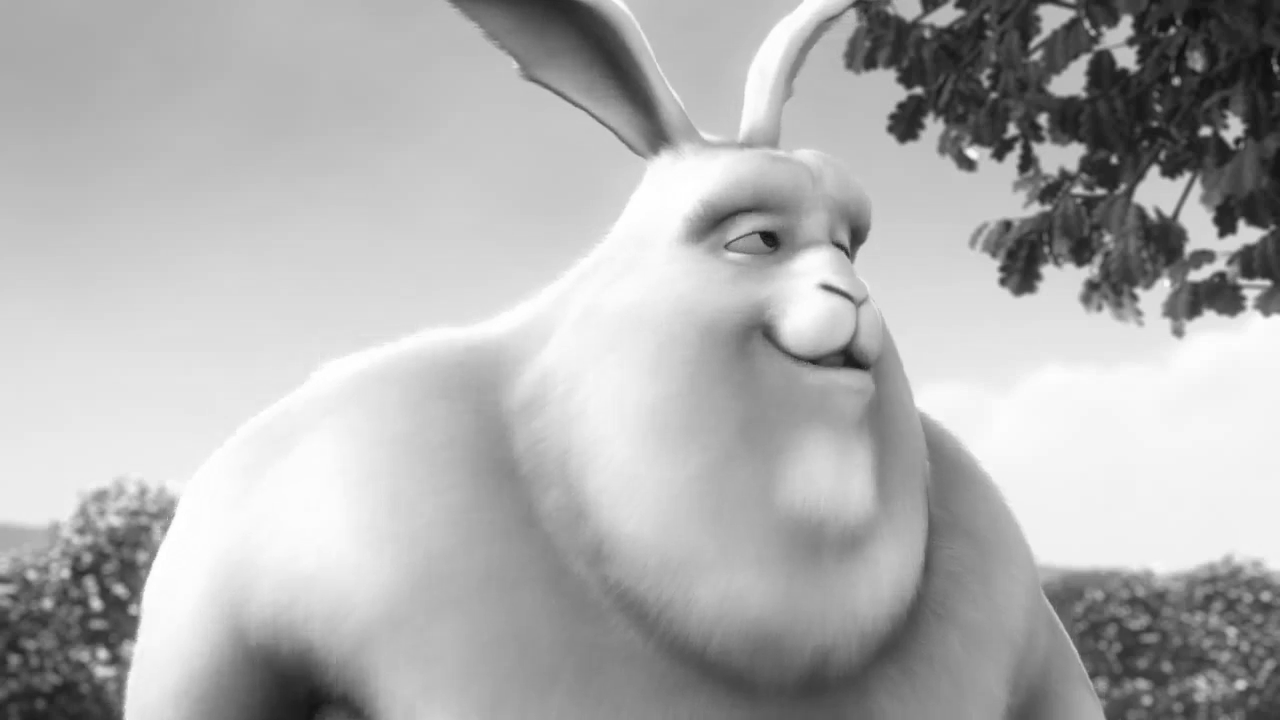

In [38]:
import cv2
from IPython.display import display, clear_output, Image
import numpy as np

def process_video_jupyter(input_path, grayscale=True):
    # Open the video file
    cap = cv2.VideoCapture(input_path)

    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()

        if not ret:
            break

        # Apply grayscale filter if specified
        if grayscale:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Display the processed frame within Jupyter
        clear_output(wait=True)
        display(frame_as_image(frame))

    # Release the video capture object
    cap.release()

def frame_as_image(frame):
    # Convert the OpenCV frame to an image format compatible with IPython.display
    _, buffer = cv2.imencode('.png', frame)
    frame_image = np.array(buffer).tobytes()
    return Image(data=frame_image, format='png')

if __name__ == "__main__":
    input_video_path = '/kaggle/input/samplevid/SampleVid.mp4'
    process_video_jupyter(input_video_path, grayscale=True)
